In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
step_pattern = re.compile(r"Progress:\s+([0-9]+)\.0%.+avg\.loss:\s+([0-9\.]+)")

def parse_train_loss(path: str):
    with open(path) as file:
        losses = np.empty(100, dtype=float)
        for line in file:
            match = step_pattern.match(line)
            if match is None:
                continue

            (percentage, loss) = match.groups()
            losses[int(percentage) - 1] = float(loss)

        return losses

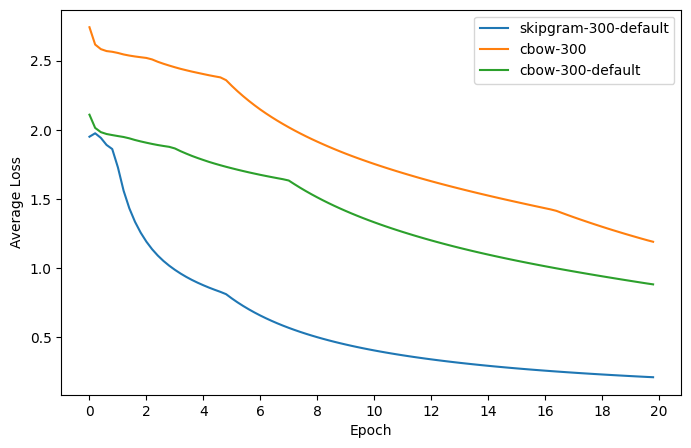

In [3]:
models = ["skipgram-300-default", "cbow-300", "cbow-300-default"]
epochs = 20

plt.figure(figsize=(8, 5))

for model in models:
    x = np.arange(0, epochs, epochs / 100)
    y = parse_train_loss(f"./models/{model}/out.txt")
    plt.plot(x, y, label=model)

plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.legend(models)
plt.xticks(range(0, epochs + 1, 2))
plt.show()